In [1]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.mllib.util import MLUtils
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import MinMaxScaler
from pyspark.sql import types
from pyspark.sql.functions import *

myrdd = sc.textFile("MSD.txt")

rdd = myrdd.map(lambda line: line.split(","))
rdd.count()


515345

In [2]:
rdd.take(40)

[['2001',
  '49.94357',
  '21.47114',
  '73.07750',
  '8.74861',
  '-17.40628',
  '-13.09905',
  '-25.01202',
  '-12.23257',
  '7.83089',
  '-2.46783',
  '3.32136',
  '-2.31521',
  '10.20556',
  '611.10913',
  '951.08960',
  '698.11428',
  '408.98485',
  '383.70912',
  '326.51512',
  '238.11327',
  '251.42414',
  '187.17351',
  '100.42652',
  '179.19498',
  '-8.41558',
  '-317.87038',
  '95.86266',
  '48.10259',
  '-95.66303',
  '-18.06215',
  '1.96984',
  '34.42438',
  '11.72670',
  '1.36790',
  '7.79444',
  '-0.36994',
  '-133.67852',
  '-83.26165',
  '-37.29765',
  '73.04667',
  '-37.36684',
  '-3.13853',
  '-24.21531',
  '-13.23066',
  '15.93809',
  '-18.60478',
  '82.15479',
  '240.57980',
  '-10.29407',
  '31.58431',
  '-25.38187',
  '-3.90772',
  '13.29258',
  '41.55060',
  '-7.26272',
  '-21.00863',
  '105.50848',
  '64.29856',
  '26.08481',
  '-44.59110',
  '-8.30657',
  '7.93706',
  '-10.73660',
  '-95.44766',
  '-82.03307',
  '-35.59194',
  '4.69525',
  '70.95626',
  '28.091

In [3]:
#Assign Column Names in the dataframe
df = rdd.map(lambda line: Row(column_0=line[0],
column_1=line[1],
column_2=line[2],
column_3=line[3],
column_4=line[4],
column_5=line[5],
column_6=line[6],
column_7=line[7],
column_8=line[8],
column_9=line[9],
column_10=line[10],
column_11=line[11],
column_12=line[12],
column_13=line[13],
column_14=line[14],
column_15=line[15],
column_16=line[16],
column_17=line[17],
column_18=line[18],
column_19=line[19],
column_20=line[20],
column_21=line[21],
column_22=line[22],
column_23=line[23],
column_24=line[24],
column_25=line[25],
column_26=line[26],
column_27=line[27],
column_28=line[28],
column_29=line[29],
column_30=line[30],
column_31=line[31],
column_32=line[32],
column_33=line[33],
column_34=line[34],
column_35=line[35],
column_36=line[36],
column_37=line[37],
column_38=line[38],
column_39=line[39],
column_40=line[40],
column_41=line[41],
column_42=line[42],
column_43=line[43],
column_44=line[44],
column_45=line[45],
column_46=line[46],
column_47=line[47],
column_48=line[48],
column_49=line[49],
column_50=line[50],
column_51=line[51],
column_52=line[52],
column_53=line[53],
column_54=line[54],
column_55=line[55],
column_56=line[56],
column_57=line[57],
column_58=line[58],
column_59=line[59],
column_60=line[60],
column_61=line[61],
column_62=line[62],
column_63=line[63],
column_64=line[64],
column_65=line[65],
column_66=line[66],
column_67=line[67],
column_68=line[68],
column_69=line[69],
column_70=line[70],
column_71=line[71],
column_72=line[72],
column_73=line[73],
column_74=line[74],
column_75=line[75],
column_76=line[76],
column_77=line[77],
column_78=line[78],
column_79=line[79],
column_80=line[80],
column_81=line[81],
column_82=line[82],
column_83=line[83],
column_84=line[84],
column_85=line[85],
column_86=line[86],
column_87=line[87],
column_88=line[88],
column_89=line[89],
column_90=line[90])).toDF()

#keep 90 attributes for numeric conversion
df_float = df.drop(df.columns[0])
#keep year for integer conversion
df_int = df.select('column_0')

#Convert all features to float
df_1 = df_float.select(*(col(c).cast("float").alias(c) for c in df_float.columns))
#Convert the target variable to integer
df_2 = df_int.select(*(col(c).cast("integer").alias(c) for c in df_int.columns))


features = df_1.rdd.map(lambda line: line[0:])

In [4]:
#Check max and min year
max_value = df_int.agg({"column_0": "max"}).collect()[0][0]
print(max_value)
min_value = df_int.agg({"column_0": "min"}).collect()[0][0]
print(min_value)

2011
1922


In [5]:
#Part 3 of assignment
#Subract lowest year to scale the year column from 0
df_year_scale = df_int.select(df_int['column_0'] - (1922))
df_year = df_year_scale.withColumnRenamed("(column_0 - 1922)", "year")
max_value = df_year.agg({"year": "max"}).collect()[0][0]
print(max_value)
min_value = df_year.agg({"year": "min"}).collect()[0][0]
print(min_value)

89.0
0.0


In [6]:
lab = df_year.rdd.map(lambda line: line[0])

#Part 2 of assignment
#Normalize features between 0 and 1
new_df = lab.zip(features.map(lambda x:Vectors.dense(x))).toDF(schema=['id','features'])

scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

# Compute summary statistics and generate MinMaxScalerModel
scalerModel = scaler.fit(new_df)
scaledData = scalerModel.transform(new_df)
print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
scaledData.select("features", "scaledFeatures").show()

Features scaled to range: [0.000000, 1.000000]
+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[49.9435691833496...|[0.80029322515753...|
|[48.7321510314941...|[0.78017706362210...|
|[50.9571418762207...|[0.81712407087869...|
|[48.2475013732910...|[0.77212923075979...|
|[50.9701995849609...|[0.81734090020216...|
|[50.5476684570312...|[0.81032457441064...|
|[50.5754585266113...|[0.81078604143414...|
|[48.2689208984375...|[0.77248491193164...|
|[49.7546806335449...|[0.79715664298378...|
|[45.1780891418457...|[0.72116021385013...|
|[39.1307601928710...|[0.62074150557080...|
|[37.6649818420410...|[0.59640157469287...|
|[26.5195693969726...|[0.41132682013302...|
|[37.6849098205566...|[0.59673248803958...|
|[39.1169509887695...|[0.62051219731753...|
|[35.0512886047363...|[0.55299998352044...|
|[33.6312904357910...|[0.52942025384348...|
|[41.3863906860351...|[0.65819729843244...|
|[37.4503402709960...|[0.5928

In [7]:
#Label the data
from pyspark.mllib.regression import LabeledPoint

#Keep only id and scaledfeatures
transformed_data = scaledData.select("id","scaledFeatures")
#Label id and scaledfeatures
LabeledData = transformed_data.rdd.map(lambda row: LabeledPoint(row[0],[row[1]]))
LabeledData.take(2)

[LabeledPoint(79.0, [0.8002932251575343,0.38404568806300277,0.46291342759525805,0.5041172303263266,0.018326313951206527,0.009168714764998686,0.025271388125387192,0.02137045419282377,0.019987852121784867,0.022476031001846676,0.025812908140343534,0.4972052206573652,0.024244034874430335,0.025518143882796083,0.046367990611727875,0.014011292442861189,0.01774231669759002,0.577498402028265,0.3451935973630509,0.45670593634049583,0.565312974472524,0.4915839092913221,0.5996291799498399,0.4644649932879773,0.6188178029793155,0.4468192304539043,0.37023388166860377,0.40602316516740716,0.35586232873291207,0.4066715937846596,0.36794466762737493,0.5515028636431315,0.6154499927863898,0.3325449388108902,0.4898039289273303,0.5646167538015274,0.5171682367013938,0.801435412436082,0.36498185529905774,0.5866681043513591,0.5186118707390299,0.6247048959388372,0.38623555623469363,0.5175370665489977,0.37058298231285675,0.5385892325508367,0.6072569509243652,0.41421610633749595,0.5734483093705985,0.4394509598202351

In [8]:
#Part 2
#Split in training and test set in 70-10-20 proportion
trainingData, validationData, testingData = LabeledData.randomSplit([.7,.1,.2],seed=1234)

In [10]:
#Part 2
#Create a baseline model using Linear Regression with stochastic gradient descent
from pyspark.mllib.regression import LinearRegressionWithSGD
linearModel = LinearRegressionWithSGD.train(trainingData,1000,.2)
linearModel.weights

DenseVector([2.9584, 1.6758, 1.7272, 2.0022, 0.2552, 0.1763, 0.2045, 0.1996, 0.1891, 0.2113, 0.191, 1.8211, 0.2489, 0.143, 0.3587, 0.1798, 0.1032, 2.3084, 1.3746, 1.7507, 2.1604, 1.9979, 1.8171, 1.848, 2.3941, 1.7322, 1.419, 1.582, 1.3671, 1.6172, 1.4353, 2.2092, 2.3737, 1.2273, 1.8733, 2.2007, 2.0225, 3.1007, 1.4441, 2.2467, 2.0284, 2.4547, 1.4542, 1.9833, 1.5533, 2.0656, 2.4061, 1.6277, 2.2429, 1.6687, 2.895, 1.6804, 1.1163, 1.0376, 1.5867, 1.0012, 1.1583, 1.9897, 2.2795, 1.6105, 1.8557, 2.7866, 2.0513, 1.3948, 1.3899, 1.0277, 2.0616, 2.2143, 2.4842, 2.2957, 3.113, 2.0483, 2.0036, 1.8999, 1.9215, 1.4373, 2.3807, 1.3596, 2.1898, 1.3687, 1.8977, 1.4403, 2.53, 2.227, 1.8018, 2.3399, 1.3288, 1.9611, 1.8371, 1.3903])

In [13]:
#Part 2
#Evaluate the model based on validation set.
from pyspark.mllib.evaluation import RegressionMetrics
prediObserRDDout = validationData.map(lambda row: (float(linearModel.predict(row.features[0])),row.label))
metrics = RegressionMetrics(prediObserRDDout)
validation_error = (metrics.rootMeanSquaredError)
print(validation_error)

10.830981055819768


In [9]:
#Part 3 - Run the model 50 times on training data with different splits.
from pyspark.mllib.regression import LinearRegressionWithSGD
from pyspark.mllib.evaluation import RegressionMetrics
train_errors = list()
for i in range(0,50):
    trainingData, validationData, testingData = LabeledData.randomSplit([.7,.1,.2],seed=i)
    linearModel = LinearRegressionWithSGD.train(trainingData,1000,.2)
    prediObserRDDout = trainingData.map(lambda row: (float(linearModel.predict(row.features[0])),row.label))
    metrics = RegressionMetrics(prediObserRDDout)
    train_errors.append(metrics.rootMeanSquaredError)
    i += 1
print(train_errors)

[10.912863338426284, 10.914487972896609, 10.916190644788605, 10.903308953873948, 10.919418351105309, 10.905317064352625, 10.896099909004064, 10.929055645461954, 10.90794374423324, 10.918138313223722, 10.912558791858292, 10.919826335746158, 10.908536423458903, 10.907624344898071, 10.933496736602548, 10.877629418481563, 10.920757888888955, 10.920447559799074, 10.904357576035126, 10.921530794958302, 10.910515364365907, 10.917789738388151, 10.920705247517446, 10.915065816808493, 10.925570329713615, 10.920798876898582, 10.918000915710444, 10.902861370134175, 10.901105255793924, 10.912412328760187, 10.935136226731498, 10.912573042288466, 10.897013538992482, 10.914411730359287, 10.932831107937563, 10.885439371298784, 10.907838450986226, 10.91452247960608, 10.928461358996984, 10.929803627166537, 10.92793876118717, 10.909475895682176, 10.914044488144214, 10.918676451961788, 10.894767055476136, 10.897079485347172, 10.906318952216283, 10.907049618120023, 10.90725859984387, 10.921964019690574]


In [72]:
#Part 3
import pandas as pd
import numpy as np
import math
%matplotlib inline
#take log of training errors
log_train_errors = [math.log(y,10) for y in train_errors]
#Number of iterations
iterations = list(float(item) for item in range(1,51))
plot_list = (list(zip(iterations,log_train_errors)))
plot_arr = np.array(plot_list)

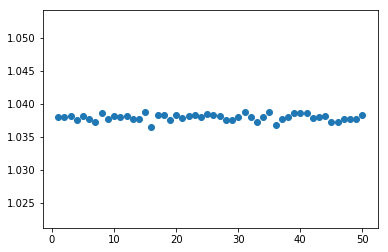

In [74]:
#Part 3
#Visualize the log of the training error as a function of iteration.
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(plot_arr[:,0],plot_arr[:,1])

In [76]:
#Part 4
#Split in training and test set in 70-10-20 proportion
trainingData, validationData, testingData = LabeledData.randomSplit([.7,.1,.2],seed=1234)
testingData.take(2)

[LabeledPoint(86.0, [0.6207415055708059,0.3316043574936292,0.3638905208619372,0.4494518523699212,0.08172270882803331,0.030640126267867572,0.10434895689713546,0.09955683445783545,0.04218347870621708,0.16816708676995173,0.06961935282010429,0.4355145022327322,0.10404345121273041,0.03549831887277413,0.13092636783101788,0.07874772558129589,0.03196972757057292,0.5895187608038731,0.36550017013115765,0.43084924587895806,0.546759166153877,0.49100381362926626,0.4244553572869894,0.46290950732605735,0.6221296430323627,0.475129630897108,0.3431760410464151,0.432948513746306,0.34953270175192186,0.4708268190924332,0.39227170615984097,0.5562590299017103,0.5980785853892988,0.3181080745744349,0.49513160178983695,0.6460516660497384,0.5137280259134668,0.7877478376484531,0.35273788846923965,0.5887980519840985,0.5467733290069894,0.6168530281699915,0.42249398326105303,0.5054998748885342,0.400165442820175,0.5235260687115667,0.7127948415948738,0.41630758842648585,0.5513513774050051,0.43511417627243215,0.7424969

In [77]:
#Part 4 - Use this model for prediction on test data
linearModel.predict([0.6207415055708059,0.3316043574936292,0.3638905208619372,0.4494518523699212,0.08172270882803331,0.030640126267867572,0.10434895689713546,0.09955683445783545,0.04218347870621708,0.16816708676995173,0.06961935282010429,0.4355145022327322,0.10404345121273041,0.03549831887277413,0.13092636783101788,0.07874772558129589,0.03196972757057292,0.5895187608038731,0.36550017013115765,0.43084924587895806,0.546759166153877,0.49100381362926626,0.4244553572869894,0.46290950732605735,0.6221296430323627,0.475129630897108,0.3431760410464151,0.432948513746306,0.34953270175192186,0.4708268190924332,0.39227170615984097,0.5562590299017103,0.5980785853892988,0.3181080745744349,0.49513160178983695,0.6460516660497384,0.5137280259134668,0.7877478376484531,0.35273788846923965,0.5887980519840985,0.5467733290069894,0.6168530281699915,0.42249398326105303,0.5054998748885342,0.400165442820175,0.5235260687115667,0.7127948415948738,0.41630758842648585,0.5513513774050051,0.43511417627243215,0.7424969835121744,0.46396321706929694,0.2984095359446288,0.24135933252640895,0.4104329856296149,0.3822336715570372,0.25224749061383517,0.5228405612325447,0.6148285713255478,0.47176356260213287,0.46498122297271144,0.7761928012902906,0.5177893017813121,0.3587509982789594,0.30672821875986633,0.27974865444914493,0.5442654032697404,0.5616382371716528,0.6368540792828871,0.6176549185055875,0.7991675005581467,0.5208286287916954,0.534038673614899,0.5277277140967686,0.4964383439155138,0.3688464904175887,0.6338148643277451,0.32167900125201715,0.5718490670436973,0.36801768870769896,0.49327941289944455,0.32338946643648603,0.6646618911580837,0.5828599820816251,0.4704336079600608,0.6259779372993892,0.3337492441600167,0.5095400691519172,0.48667134512287985,0.382117115016819])

76.70441765149296

In [78]:
#Part 4
#Calculate Root Mean Square Error of our model.
prediObserRDDtest = testingData.map(lambda row: (float(linearModel.predict(row.features[0])),row.label))
metrics = RegressionMetrics(prediObserRDDtest)
testing_error = (metrics.rootMeanSquaredError)
print(testing_error)

10.930997735545324
